In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [240]:
# Importing libraries

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
#To track function execution
from tqdm import tqdm
from bs4 import BeautifulSoup

#Libraries for Sentimental analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Libraries for visualization
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
from scipy.sparse.linalg import svds

#Libraries for ML
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
# Reading dataframe
df = pd.read_csv("Reviews.csv")

In [4]:
#Looking at top 5 rows
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Not that we have 10 features and 568454 data points. There are some missing values in 'PROFILENAME' & 'SUMMARY' column. 

In [5]:
# Checking for null values in the dataframe.
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
# Inspecting entries with Null value in profileName column 
df[df["ProfileName"].isnull()]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
25509,25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,1314576000,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all g...
38874,38875,B000AYDGZ2,A36BVYD0NT7Z0F,NaN,2,3,1,1278374400,doesn't anyone care that they are putting BHT ...,I called Kellogg's to see why Special K red be...
49800,49801,B000CRHQN0,A2LYFY32LXQDON,NaN,0,0,2,1282608000,They were melted and the chocolate had turned ...,We love these bars but i won't order them ship...
67077,67078,B0006348H2,A2P0P67Y55SNOX,NaN,1,1,5,1314662400,Wheatgrass,Kitty seems to like this sprinkled on her food...
106550,106551,B001EQ5DG0,A1P500QXEG3IUZ,NaN,0,0,5,1326758400,Finally!,"You cannot find this in the stores anymore, it..."
137613,137614,B000CQE3HS,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...
163191,163192,B000CQID1A,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...
172462,172463,B001FA1L9I,AC9U70TRGPDGJ,NaN,0,0,5,1289520000,very good,came in proper packaging. Have loved British ...
297275,297276,B007OXJM6E,A29D7XVSBCLFLD,NaN,0,0,1,1325203200,Burnt,The last SEVERAL time we bought this it tasted...
306751,306752,B000RI1W8E,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...


In [7]:
# Dropping Null values
df.dropna(inplace=True)

In [8]:
# Checking if null value exist again
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [9]:
# Checking the columns of the reviews.
df.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [10]:
#Checking the shape of the dataframe.
df.shape

(568411, 10)

In [11]:
# Checking for the info of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568411 non-null int64
ProductId                 568411 non-null object
UserId                    568411 non-null object
ProfileName               568411 non-null object
HelpfulnessNumerator      568411 non-null int64
HelpfulnessDenominator    568411 non-null int64
Score                     568411 non-null int64
Time                      568411 non-null int64
Summary                   568411 non-null object
Text                      568411 non-null object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [12]:
# Statistical analysis of the dataframe.
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,284227.440964,1.743874,2.227876,4.183309,1.296261e+09
std,164099.020907,7.636781,8.288752,1.310368,4.803792e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142114.500000,0.000000,0.000000,4.000000,1.271290e+09
50%,284224.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426341.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


In [13]:
# Checking number of reviews for each score.
df["Score"].value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

# **Exploratory Data Analysis**

Note that more than 75% of our data is belonging to positive class(Score=4,5), i.e. we have imbalanced dataset.

In [14]:
total = df["Score"].count()
print(total)

568411


In [15]:
percent_plot = pd.DataFrame({"Total":df["Score"].value_counts()})
percent_plot.reset_index(inplace = True)
percent_plot.rename(columns={"index":"Rating"},inplace=True)

In [16]:
percent_plot

,Rating,Total
0,5,363111
1,4,80655
2,1,52264
3,3,42638
4,2,29743


Below is the plot of number of ratings each score has received.

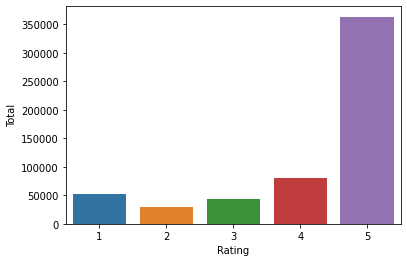

In [17]:
sns.barplot(x="Rating",y="Total", data=percent_plot)

In [18]:
percent_plot["Percent"] = percent_plot["Total"].apply(lambda x: (x/total)*100)

In [19]:
#percent_plot.drop(['percent'],axis=1, inplace = True)

We can see that 5-star reviews constitute a large proportion (63.88%) of all reviews. The next most prevalent rating is 4-stars(14.18%), followed by 1-star (9.19%), 3-star (7.50%), and finally 2-star reviews (5.23%).

In [20]:
percent_plot

,Rating,Total,Percent
0,5,363111,63.881769
1,4,80655,14.189557
2,1,52264,9.194755
3,3,42638,7.501262
4,2,29743,5.232657


Below is the plot of Ratings and its percentage.

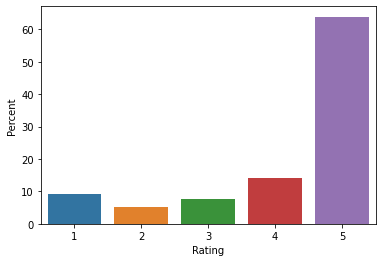

In [21]:
sns.barplot(x="Rating", y="Percent", data = percent_plot)

# **Text Exploration**

In [22]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [23]:
df["word_count"] = df["Text"].apply(lambda x: len(str(x).split(" ")))
df[["Text","word_count"]].head()

,Text,word_count
0,I have bought several of the Vitality canned d...,49
1,Product arrived labeled as Jumbo Salted Peanut...,31
2,This is a confection that has been around a fe...,99
3,If you are looking for the secret ingredient i...,43
4,Great taffy at a great price. There was a wid...,30


In [24]:
# Checking the statistics of word count to check for range and average number of the words in each article.
df["word_count"].describe()

count    568411.000000
mean         82.008950
std          80.808843
min           3.000000
25%          34.000000
50%          58.000000
75%         100.000000
max        3526.000000
Name: word_count, dtype: float64

In [25]:
#Checking for top 20 most repeated words - Gives insights on data specific stop words.

common_words = pd.Series(' '.join(df["Text"]).split()).value_counts()
common_words[:20]

the     1628022
I       1388024
and     1228619
a       1163101
to       992344
of       789642
is       714256
it       631240
for      519980
in       512386
this     488303
that     400460
my       364014
with     336238
have     335281
but      324902
are      310922
was      307851
not      285042
you      280381
dtype: int64

In [26]:
# Checking 20 most uncommon words
common_words[-20:]

brew,it            1
test-              1
delivery.price     1
/>close.           1
fiend--let's       1
said-and-done      1
processor),        1
"flavor-down"      1
Ivernia            1
(primal            1
Sundae.<br         1
juice/soft         1
Pomodoro"          1
AND...BETTER       1
five-plus          1
Loraine            1
canisters.)        1
PLEASED!           1
asthma--imagine    1
Leaders:           1
dtype: int64

# **Text Preprocessing**

In [27]:
# Removing Stopwords
stop_words = set(stopwords.words("english"))

# Adding common words from our document to stop_words

add_words = ["the","I","and","a","to","of","is","it","for","in","this","that","my","with",     
"have",     
"but",      
"are",      
"was",      
"not",      
"you"]

stop_words = stop_words.union(add_words)

In [28]:
#Below Function is to clean the text and prepare it for the next phase.

from tqdm import tqdm
corpus = []

def clean_content(df):
    cleaned_content = []
    
    for sent in tqdm(df["Text"]):
        
        #Removing HTML comtent
        review_content = BeautifulSoup(sent).get_text()
        
        #Removing non-alphabetic charecters
        review_content = re.sub("[^a-zA-Z]"," ", review_content)
        
        #Tokenize the sentences
        words = word_tokenize(review_content.lower())
        
        #Removing the stop words
        sto_words_removed = [word for word in words if not word in stop_words]
        sto_words_removed = " ".join(sto_words_removed)
        corpus.append(sto_words_removed)
        cleaned_content.append(sto_words_removed)
        
    return (cleaned_content)

In [29]:
df["cleaned_text"] = clean_content(df)

100%|████████████████████████████████████████████████████████████████████████| 568411/568411 [05:00<00:00, 1892.82it/s]


In [30]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,word_count,cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,product arrived labeled jumbo salted peanuts p...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,great taffy great price wide assortment yummy ...


# **Data Exploration**

Building a wordcloud to visualize most frequently used words after Text pre-processing stage  

In [31]:
wordcloud = WordCloud(
                    background_color = "white",
                    stopwords = stop_words,
                    max_words = 100,
                    max_font_size = 50).generate(str(corpus))

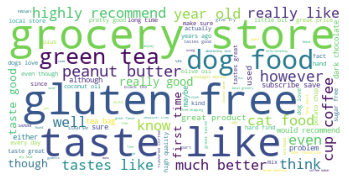

In [32]:
# Displaying the word cloud
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=900)

# Recommender System

In [34]:
rec_df = df[['ProductId', 'UserId','Score']]

In [35]:
rec_df.columns

Index(['ProductId', 'UserId', 'Score'], dtype='object')

In [36]:
# Finding the unique userId and ProductID
print("Number of unique users = ", df['UserId'].nunique())
print("Number of unique products = ", df['ProductId'].nunique())

Number of unique users =  256047
Number of unique products =  74258


In [37]:
# Score description
rec_df[['Score']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Score,568411.0,4.183309,1.310368,1.0,4.0,5.0,5.0,5.0


In [38]:
counts = rec_df['UserId'].value_counts()
#df_top50 = rec_df[rec_df['UserID']]

In [39]:
df_top50 = rec_df[rec_df['UserId'].isin(counts[counts >= 50].index)]

In [40]:
df_top50.head()

,ProductId,UserId,Score
14,B001GVISJM,A2MUGFV2TDQ47K,5
44,B001EO5QW8,A2G7B7FKP2O2PU,5
46,B001EO5QW8,AQLL2R1PPR46X,5
109,B001REEG6C,AY12DBB0U420B,5
141,B001GVISJW,A2YIO225BTKVPU,4


In [41]:
print("Number of users who have rated 50 or more items = ", len(df_top50))
print("Number of unique users who have rated more than 50 items = ", df_top50['UserId'].nunique())
print("Number of unique items in the list = ", df_top50['ProductId'].nunique())

Number of users who have rated 50 or more items =  22941
Number of unique users who have rated more than 50 items =  267
Number of unique items in the list =  11313


In [42]:
#Calculating the density for this matrix
final_rating_matrix = pd.pivot_table(df_top50, index='UserId', columns = 'ProductId', values = 'Score')

In [43]:
final_rating_matrix.fillna(0, inplace = True)

In [44]:
final_rating_matrix.shape

(267, 11313)

In [45]:
# Matrix for Item based Recommender system where product on the column and User on the row.
final_rating_matrix_item = final_rating_matrix.transpose()
final_rating_matrix_item.head()

UserId,A100WO06OQR8BQ,A106ZCP7RSXMRU,A1080SE9X3ECK0,A10G136JEISLVR,A11ED8O95W2103,A11OTLEDSW8ZXD,A12ENBT314RFXR,A132ETQPMHQ585,A13GZCHAMKWYBT,A13HRSMJ5TOWEZ,...,ATJN4KEHJBOC8,AVFA1JB08RG8G,AWKZAUC0D8DYL,AXO4PQU0XG3TG,AY12DBB0U420B,AY1EF0GOH80EK,AYB4ELCS5AM8P,AYGJ96W5KQMUJ,AYOMAHLWRQHUG,AZV26LP92E6WU
ProductId,,,,,,,,,,,,,,,,,,,,,
7310172001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7310172101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7800648702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004CI84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
B00004CXX9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Creating train test split of the data into 70:30
train_data, test_data = train_test_split(df_top50, test_size = 0.3, random_state = 0)
train_data.head()

,ProductId,UserId,Score
399863,B002IEVJRY,A1N5FSCYN4796F,3
20262,B001BDDTB2,A1Q7A78VSQ5GQ4,5
139611,B001BCXTGS,A2PNOU7NXB1JE4,3
455504,B005HG9ERW,A2SZLNSI5KOQJT,3
512008,B0028PDER6,ALSAOZ1V546VT,5


### Popularity based recommender model

In [47]:
train_data_group = train_data.groupby('ProductId'.agg)

AttributeError: 'str' object has no attribute 'agg'

In [48]:
train_data_grouped = train_data.groupby('ProductId').agg({'UserId':'count'}).reset_index()

In [49]:
train_data_grouped.head()

,ProductId,UserId
0,7310172001,5
1,7310172101,5
2,7800648702,1
3,B00004CI84,2
4,B00004CXX9,3


In [50]:
train_data_grouped.rename(columns= {'UserId':'Score'},inplace=True)
train_data_grouped.head()

,ProductId,Score
0,7310172001,5
1,7310172101,5
2,7800648702,1
3,B00004CI84,2
4,B00004CXX9,3


In [51]:
train_data_sort = train_data_grouped.sort_values(['Score','ProductId'],ascending = False)

In [52]:
train_data_sort.head()

,ProductId,Score
5621,B002IEZJMA,48
8130,B006MONQMC,42
5620,B002IEVJRY,41
7876,B005HG9ET0,39
6779,B0041NYV8E,39


In [53]:
# Generating Recommendation Rank
train_data_sort['Rank'] = train_data_sort['Score'].rank(ascending=0, method='first')
train_data_sort.head()

,ProductId,Score,Rank
5621,B002IEZJMA,48,1.0
8130,B006MONQMC,42,2.0
5620,B002IEVJRY,41,3.0
7876,B005HG9ET0,39,4.0
6779,B0041NYV8E,39,5.0


In [54]:
# Top 10 popularity based recommendations are:
pop_rec = train_data_sort.head(10)
pop_rec

,ProductId,Score,Rank
5621,B002IEZJMA,48,1.0
8130,B006MONQMC,42,2.0
5620,B002IEVJRY,41,3.0
7876,B005HG9ET0,39,4.0
6779,B0041NYV8E,39,5.0
7874,B005HG9ERW,38,6.0
5657,B002LANN56,36,7.0
5052,B001VJ0B0I,36,8.0
3607,B001BCVY9W,33,9.0
6972,B004728MI4,32,10.0


In [55]:
# Using Popularity Based Recommendation System to make Prediction.
def make_recommendation(user_id):
    user_recommendation = pop_rec
    # Adding user Id to popularity based recommender system
    user_recommendation['user_id'] = user_id
    
    cols = user_recommendation.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendation = user_recommendation[cols]
    
    return user_recommendation

In [56]:
user_list = [15, 121, 200]

for i in user_list:
    print("Recommendation for userId: {}".format(i))
    print(make_recommendation(i))
    print()

Recommendation for userId: 15
      user_id   ProductId  Score  Rank
5621       15  B002IEZJMA     48   1.0
8130       15  B006MONQMC     42   2.0
5620       15  B002IEVJRY     41   3.0
7876       15  B005HG9ET0     39   4.0
6779       15  B0041NYV8E     39   5.0
7874       15  B005HG9ERW     38   6.0
5657       15  B002LANN56     36   7.0
5052       15  B001VJ0B0I     36   8.0
3607       15  B001BCVY9W     33   9.0
6972       15  B004728MI4     32  10.0

Recommendation for userId: 121
      user_id   ProductId  Score  Rank
5621      121  B002IEZJMA     48   1.0
8130      121  B006MONQMC     42   2.0
5620      121  B002IEVJRY     41   3.0
7876      121  B005HG9ET0     39   4.0
6779      121  B0041NYV8E     39   5.0
7874      121  B005HG9ERW     38   6.0
5657      121  B002LANN56     36   7.0
5052      121  B001VJ0B0I     36   8.0
3607      121  B001BCVY9W     33   9.0
6972      121  B004728MI4     32  10.0

Recommendation for userId: 200
      user_id   ProductId  Score  Rank
5621     

In popolarity Based Recommendation System, as you can see from above the recommendation remains same for all the users. We recommend product based on its popularity and its not personalized to any perticular user. 

# Building Collaborative Filtering Model

<p>
<p>

Collaborative filtering approach builds a model from a user’s past behaviors (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that the user may have an interest in.

### Item Based Recommender System


Recommend products based on the similarity between items calculated using people's ratings of those items using KNN classifier algorithm. 

In [134]:
count = df.groupby("ProductId", as_index = False).count()
mean = df.groupby('ProductId', as_index = False).mean()

In [135]:
df1 = pd.merge(df,count, how='right', on=["ProductId"])

In [136]:
df1.head()

,Id_x,ProductId,UserId_x,ProfileName_x,HelpfulnessNumerator_x,HelpfulnessDenominator_x,Score_x,Time_x,Summary_x,Text_x,...,UserId_y,ProfileName_y,HelpfulnessNumerator_y,HelpfulnessDenominator_y,Score_y,Time_y,Summary_y,Text_y,word_count_y,cleaned_text_y
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,1,1,1,1,1,1,1,1,1,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,1,1,1,1,1,1,1,1,1,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,...,1,1,1,1,1,1,1,1,1,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,...,1,1,1,1,1,1,1,1,1,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,...,4,4,4,4,4,4,4,4,4,4


In [137]:
df1["count"] = df1["UserId_y"]
df1["Score"] = df1["Score_x"]
df1["Summary"] = df1["Summary_x"]

In [138]:
df1.head()

,Id_x,ProductId,UserId_x,ProfileName_x,HelpfulnessNumerator_x,HelpfulnessDenominator_x,Score_x,Time_x,Summary_x,Text_x,...,HelpfulnessDenominator_y,Score_y,Time_y,Summary_y,Text_y,word_count_y,cleaned_text_y,count,Score,Summary
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,1,1,1,1,1,1,1,1,5,Good Quality Dog Food
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,1,1,1,1,1,1,1,1,1,Not as Advertised
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,...,1,1,1,1,1,1,1,1,4,"""Delight"" says it all"
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,...,1,1,1,1,1,1,1,1,2,Cough Medicine
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,...,4,4,4,4,4,4,4,4,5,Great taffy


In [139]:
df1 = df1[['ProductId','Summary','Score','count']]

In [140]:
# Choosing those products having over 100 reviews
df1 = df1.sort_values(["count"], ascending = False)
df_100 = df1[df1['count'] >= 100]

In [141]:
df_100.head()

,ProductId,Summary,Score,count
563838,B007JFMH8M,yummy,5,913
563572,B007JFMH8M,Healthy and yummy too,5,913
563586,B007JFMH8M,Soft and chewy but a bit too sweet!,4,913
563585,B007JFMH8M,Pretty Good Cookie,4,913
563584,B007JFMH8M,Good Taste and Flavor But a Little on the Dry ...,3,913


In [142]:
combined_summary = df_100.groupby("ProductId")["Summary"].apply(list)

In [143]:
df3 = df_100.groupby("ProductId", as_index = False ).mean()

In [144]:
# Adding combined summary to the dataframe
df4 = pd.merge(df3, combined_summary, on = "ProductId", how = "inner")

In [145]:
df4.head()

,ProductId,Score,count,Summary
0,7310172001,4.751445,173.0,"[Great for Diabetic Dog, Good Stuff, Amazing T..."
1,7310172101,4.751445,173.0,[NO waste at all ---- great for training ---...
2,B00004CI84,4.486772,189.0,"[Always a laugh!, Tim Burton's imagination goe..."
3,B00004CXX9,4.405128,195.0,"[Great Comedy, PG? Not!, Awesome movie!, aging..."
4,B00004RAMY,4.104651,172.0,"[Caught the mole within 12 hours!, Set it the ..."


In [146]:
df4 = df4[['ProductId','Score','Summary']]

In [147]:
df4.head()

,ProductId,Score,Summary
0,7310172001,4.751445,"[Great for Diabetic Dog, Good Stuff, Amazing T..."
1,7310172101,4.751445,[NO waste at all ---- great for training ---...
2,B00004CI84,4.486772,"[Always a laugh!, Tim Burton's imagination goe..."
3,B00004CXX9,4.405128,"[Great Comedy, PG? Not!, Awesome movie!, aging..."
4,B00004RAMY,4.104651,"[Caught the mole within 12 hours!, Set it the ..."


#### Cleaning the Summary and creating TF-IDF

In [148]:
# Tokenizing
cleanu = re.compile('[^a-z]+')

def cleanup(sent):
    sent = [i.lower() for i in sent]
    sent = ",".join(sent)
    sent = sent.lower()
    sent = cleanu.sub(' ',sent).strip()
    sent = " ".join(nltk.word_tokenize(sent))
    return sent

In [149]:
df4["summary_cleaned"] = df4["Summary"].apply(cleanup)

In [150]:
df4.head()

,ProductId,Score,Summary,summary_cleaned
0,7310172001,4.751445,"[Great for Diabetic Dog, Good Stuff, Amazing T...",great for diabetic dog good stuff amazing trai...
1,7310172101,4.751445,[NO waste at all ---- great for training ---...,no waste at all great for training all dogs lo...
2,B00004CI84,4.486772,"[Always a laugh!, Tim Burton's imagination goe...",always a laugh tim burton s imagination goes w...
3,B00004CXX9,4.405128,"[Great Comedy, PG? Not!, Awesome movie!, aging...",great comedy pg not awesome movie aging classi...
4,B00004RAMY,4.104651,"[Caught the mole within 12 hours!, Set it the ...",caught the mole within hours set it the way ot...


In [151]:
df4 = df4.drop_duplicates(['Score'], keep='last')

In [152]:
df4 = df4.reset_index()

In [153]:
df4.head()

,index,ProductId,Score,Summary,summary_cleaned
0,3,B00004CXX9,4.405128,"[Great Comedy, PG? Not!, Awesome movie!, aging...",great comedy pg not awesome movie aging classi...
1,4,B00004RAMY,4.104651,"[Caught the mole within 12 hours!, Set it the ...",caught the mole within hours set it the way ot...
2,5,B00004RYGX,4.486772,"[Tim Burton's imagination goes wild!, Awesome ...",tim burton s imagination goes wild awesome rem...
3,6,B000084E6V,4.107345,"[Best Chew Toy for a Lab!, Good product, A gre...",best chew toy for a lab good product a great s...
4,10,B0000V8IOE,3.927419,"[Excellent, Love it , love it , love it, Not a...",excellent love it love it love it not a good p...


In [154]:
document = df4["summary_cleaned"]
vect = CountVectorizer(max_features = 100, stop_words = 'english')
X = vect.fit_transform(document)

In [155]:
df5 = pd.DataFrame(X.A, columns = vect.get_feature_names())

In [156]:
df5 = df5.astype(int)

In [157]:
df5.head()

,alternative,amazing,awesome,baby,bad,bar,bars,best,better,big,...,value,vanilla,ve,water,way,wonderful,work,works,yum,yummy
0,0,0,6,0,1,0,0,9,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,3,0,0,0,0,11,0,0,...,0,0,2,0,4,0,8,31,0,0
2,0,0,6,0,1,0,0,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,0,2,0,0,10,0,4,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,2,0,0,10,0,0,...,1,0,2,0,0,3,0,0,0,0


In [158]:
X = df5.to_numpy()

In [159]:
type(X)

numpy.ndarray

In [160]:
df5_train, df5_test = train_test_split(X, test_size = 0.1, random_state = 42)

In [161]:
print(df5_train.size)
print(df5_test.size)

32400
3700


#### Building KNN classifier to find similar products

In [162]:
knn = NearestNeighbors(n_neighbors=3, algorithm='ball_tree')

In [163]:
knn.fit(df5_train)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [164]:
distances, indices = knn.kneighbors(df5_train)

In [165]:
len_train = len(df5_train)
len_test = len(df5_test)

In [167]:
for i in range(len_test):
    a = knn.kneighbors([df5_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df4["ProductId"][len_train + i] ," and this average Score is ",df4["Score"][len_train + i])
    print ("The first similar product is ", df4["ProductId"][first_related_product] ," and this average Score is ",df4["Score"][first_related_product])
    print ("The second similar product is ", df4["ProductId"][second_related_product] ," and this average Score is ",df4["Score"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B007TGDXMU  and this average Score is  4.517006802721088
The first similar product is  B002AQP5FW  and this average Score is  4.036036036036036
The second similar product is  B003ZT61E2  and this average Score is  3.825641025641026
-----------------------------------------------------------
Based on product reviews, for  B007TGDXNO  and this average Score is  4.3478260869565215
The first similar product is  B000V17MLS  and this average Score is  4.7040358744394615
The second similar product is  B000084E6V  and this average Score is  4.107344632768362
-----------------------------------------------------------
Based on product reviews, for  B007TJGY5K  and this average Score is  4.119496855345912
The first similar product is  B0008IT4OM  and this average Score is  3.9415584415584415
The second similar product is  B001KUSLGY  and this average Score is  3.7751937984496124
-----------------------------------------------------------
Based on product reviews, f

The first similar product is  B007RTR898  and this average Score is  3.548076923076923
The second similar product is  B000REI2X6  and this average Score is  4.057894736842106
-----------------------------------------------------------
Based on product reviews, for  B008J1HO4C  and this average Score is  4.682584269662922
The first similar product is  B0045IO37Y  and this average Score is  4.054054054054054
The second similar product is  B001D0IZ4O  and this average Score is  3.099099099099099
-----------------------------------------------------------
Based on product reviews, for  B008JKU2CO  and this average Score is  4.361038961038961
The first similar product is  B003YBLF2E  and this average Score is  3.2950819672131146
The second similar product is  B0031UBXDE  and this average Score is  4.087378640776699
-----------------------------------------------------------
Based on product reviews, for  B008O3G2K2  and this average Score is  3.5060240963855422
The first similar product is 

### User based Recommeder System

User based recommender system works based on the assumption that similar people have similar taste. In our model we find the K-nearest neighbors (KNN) to the user, using a similarity function to measure the distance between each pair of users. 

In [168]:
count = df.groupby("UserId", as_index = False).count()
mean = df.groupby("UserId", as_index = False).mean()

df1 = pd.merge(df,count, how = "right", on=["UserId"])

In [169]:
df1["Count"] = df1["ProductId_y"]
df1["Score"] = df1["Score_x"]
df1["Summary"] = df1["Summary_x"]

df1 = df1[["UserId","Summary","Score","Count"]]

In [170]:
df1.head()

,UserId,Summary,Score,Count
0,A3SGXH7AUHU8GW,Good Quality Dog Food,5,1
1,A1D87F6ZCVE5NK,Not as Advertised,1,1
2,ABXLMWJIXXAIN,"""Delight"" says it all",4,3
3,ABXLMWJIXXAIN,"Fast, Easy and organic",4,3
4,ABXLMWJIXXAIN,Awesome service and great products,5,3


In [171]:
df1 = df1.sort_values(['Count'], ascending = False)
df2 = df1[df1.Count >= 100]

In [172]:
df2.head()

,UserId,Summary,Score,Count
3406,A3OXHLG6DIBRW8,Good Tasting Sugar Free Cookies - Recommended,4,448
3436,A3OXHLG6DIBRW8,Diabetic Friendly Snack - Highly Recommended,5,448
3442,A3OXHLG6DIBRW8,Very Smooth Coffee - Highly Recommended,5,448
3441,A3OXHLG6DIBRW8,"Good Tasting, But Oh So Small - Recommended",4,448
3440,A3OXHLG6DIBRW8,Really Great Tasting Beef Jerky! Highly Recomm...,5,448


In [173]:
df3 = df.groupby("UserId", as_index = False).mean()
df3.head()

,UserId,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,word_count
0,#oc-R103C0QSV1DF5E,136323.0,1.0,2.0,5.0,1.343088e+09,56.0
1,#oc-R109MU5OBBZ59U,516062.0,0.0,1.0,5.0,1.350086e+09,21.0
2,#oc-R10LFEMQEW6QGZ,516079.0,0.0,1.0,5.0,1.345939e+09,85.0
3,#oc-R10LT57ZGIB140,378693.0,0.0,0.0,3.0,1.310602e+09,45.0
4,#oc-R10UA029WVWIUI,136545.0,0.0,0.0,1.0,1.342483e+09,66.0


In [174]:
total_summary = df2.groupby("UserId")["Summary"].apply(list)

In [175]:
df4 = pd.merge(df3, total_summary, on="UserId", how = "inner")
df4 = df4[["UserId","Summary","Score"]]

In [176]:
df4.head()

,UserId,Summary,Score
0,A17HMM1M7T9PJ1,"[Another great dark K-cup coffee, I was so exc...",4.477876
1,A1GYEGLX3P2Y7P,"[Shiny hair and no itchy scalp, Classic cinnam...",4.586538
2,A1HRYC60VTMYC0,[What's not to like about Kraft Mac and Cheese...,4.626984
3,A1IU7S4HCK1XK0,"[Beautiful and functional, Excellent sandwich ...",4.592857
4,A1LZJZIHUPLDV4,"[Vegan Natural Kosher Choice, Vegan Kosher Glu...",4.987013


In [177]:
df4["CleanedSummary"] = df4["Summary"].apply(cleanup)
df4.drop_duplicates(["Score"], keep = "last")
df4.reset_index()
df4.head()

,UserId,Summary,Score,CleanedSummary
0,A17HMM1M7T9PJ1,"[Another great dark K-cup coffee, I was so exc...",4.477876,another great dark k cup coffee i was so excit...
1,A1GYEGLX3P2Y7P,"[Shiny hair and no itchy scalp, Classic cinnam...",4.586538,shiny hair and no itchy scalp classic cinnamon...
2,A1HRYC60VTMYC0,[What's not to like about Kraft Mac and Cheese...,4.626984,what s not to like about kraft mac and cheese ...
3,A1IU7S4HCK1XK0,"[Beautiful and functional, Excellent sandwich ...",4.592857,beautiful and functional excellent sandwich co...
4,A1LZJZIHUPLDV4,"[Vegan Natural Kosher Choice, Vegan Kosher Glu...",4.987013,vegan natural kosher choice vegan kosher glute...


#### Vectorizing the text data

In [190]:
docs = df4["CleanedSummary"]
tfidf = TfidfVectorizer(stop_words = "english")
X = tfidf.fit_transform(docs)

In [191]:
tfidf.get_feature_names()

['absolute',
 'absolutely',
 'acai',
 'accent',
 'accents',
 'accoutrements',
 'acid',
 'acidic',
 'acquired',
 'activated',
 'active',
 'actual',
 'actually',
 'adaptations',
 'add',
 'added',
 'addict',
 'addicted',
 'addicting',
 'addiction',
 'addictive',
 'adding',
 'addition',
 'additional',
 'additions',
 'additive',
 'additives',
 'adds',
 'adequately',
 'adore',
 'adores',
 'adult',
 'adulterated',
 'adults',
 'adventure',
 'adventurous',
 'advertised',
 'advertising',
 'aerogarden',
 'afficionado',
 'affordable',
 'affordably',
 'afternoon',
 'aftertaste',
 'agave',
 'age',
 'ages',
 'aggressive',
 'ago',
 'agree',
 'agreed',
 'agrees',
 'agressive',
 'ah',
 'ahem',
 'aid',
 'aidesque',
 'aiding',
 'ails',
 'ain',
 'alaska',
 'albeit',
 'ale',
 'alert',
 'ales',
 'alfredo',
 'alive',
 'allergen',
 'allergic',
 'allergies',
 'allergy',
 'alliterative',
 'allow',
 'alm',
 'almond',
 'almonds',
 'alot',
 'alright',
 'alternative',
 'altitude',
 'altoids',
 'aluminum',
 'amazing'

In [194]:
df5 = pd.DataFrame(X.A, columns = tfidf.get_feature_names())
df5.head()

,absolute,absolutely,acai,accent,accents,accoutrements,acid,acidic,acquired,activated,...,zero,zesty,zevia,zico,zing,zinger,zip,zoe,zuke,zukes
0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.01305,0.0,0.0,0.0,0.025689,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.023357,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.033516,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


#### Building KNN Classifier to find similar users and their interesting products

In [197]:
X = np.array(df5)

df5_train, df5_test = train_test_split(X, test_size = 0.05, random_state = 42)

In [201]:
df6 = df.drop_duplicates(['Summary'], keep='last')
df6 = df6.reset_index()

In [200]:
len_train = len(df5_train)
len_test = len(df5_test)

knn_u = NearestNeighbors(n_neighbors = 3, algorithm = 'ball_tree')
knn_u.fit(df5_train)

distance, indices = knn_u.kneighbors(df5_train)

In [213]:
# Finding the similar users and their products

for i in range(len_test):
    a = knn_u.kneighbors([df5_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    
    print ("Based on  reviews, for the user", df3["UserId"][len_train + i])
    print ("The first similar user is ", df3["UserId"][first_related_product]) 
    print ("He/She likes following products")
    count = 0
    for i in range(295736):
        if (df6["UserId"][i] == df4["UserId"][first_related_product]) & (df6["Score"][i] == 5):
            aaa= df6["ProductId"][i]
            count += 1
            print (aaa)
        
        if count == 10:
            break
    print ("--------------------------------------------------------------------")

Based on  reviews, for the user #oc-R1CSQFEG6ZI93U
The first similar user is  #oc-R11DNU2NBKQ23Z
He/She likes following products
B000E1BM16
B001KU0PEK
B003DNL9U6
B0049ZCFBE
B0005YWSYM
B001KU2TZI
B004ZY7NKC
B003DNL9VA
B003DNL9VK
B000F7W1WI
--------------------------------------------------------------------
Based on  reviews, for the user #oc-R1DRI2RP4P2TRV
The first similar user is  #oc-R1A8CVV3LZ4W8Q
He/She likes following products
B0025ULYKI
B004ZIER34
B00094HGMM
B000N5XCXO
B003FJTAF4
B000V20606
B003OPCL5U
B00063KNX0
B0002AQKDY
B000VK33A8
--------------------------------------------------------------------
Based on  reviews, for the user #oc-R1E24XY86FJXDH
The first similar user is  #oc-R1730HL4795MHX
He/She likes following products
B002BCD2GO
B000I05WLY
B005UFUXRA
B000F959NO
B003P7ZMDA
B001GQ3E2S
B004M6DC9Y
B001IZIBAM
B002EDEMLY
B000NNCP9S
--------------------------------------------------------------------
Based on  reviews, for the user #oc-R1E8ZSZLNTT3DS
The first similar user is

### Recommendation system using - Singular Value Decomposition - SVD

In [219]:
counts = df['UserId'].value_counts()
df_svd = df[df['UserId'].isin(counts[counts >= 50].index)]

In [220]:
df_svd.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,word_count,cleaned_text
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,22,strawberry twizzlers guilty pleasure yummy six...
44,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,1209686400,Great taste and convenience,We really like the McCann's steel cut oats but...,44,really like mccann steel cut oats find cook of...
46,47,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0,0,5,1192752000,good,Good oatmeal. I like the apple cinnamon the b...,50,good oatmeal like apple cinnamon best though f...
109,110,B001REEG6C,AY12DBB0U420B,Gary Peterson,0,0,5,1316390400,My Idea of a Good Diet Food.,I'm presently on a diet and I was at my Fresh ...,134,presently diet fresh easy neighborhood grocery...
141,142,B001GVISJW,A2YIO225BTKVPU,"Angel_Boy ""Treat the people around you the wa...",0,0,4,1301788800,Good Licorice,Twizzlers brand licorice is much better than t...,47,twizzlers brand licorice much better well know...


In [221]:
df_svd = df_svd.drop(['word_count','cleaned_text','Id','ProfileName','Time','HelpfulnessNumerator','HelpfulnessDenominator','Text','Summary'], axis = 1)

In [222]:
df_svd.head()

,ProductId,UserId,Score
14,B001GVISJM,A2MUGFV2TDQ47K,5
44,B001EO5QW8,A2G7B7FKP2O2PU,5
46,B001EO5QW8,AQLL2R1PPR46X,5
109,B001REEG6C,AY12DBB0U420B,5
141,B001GVISJW,A2YIO225BTKVPU,4


In [224]:
train_data, test_data = train_test_split(df_svd, test_size = 0.3, random_state = 0)

In [230]:
df_svd = df_svd.reset_index()

In [231]:
df_svd.head()

,index,ProductId,UserId,Score
0,14,B001GVISJM,A2MUGFV2TDQ47K,5
1,44,B001EO5QW8,A2G7B7FKP2O2PU,5
2,46,B001EO5QW8,AQLL2R1PPR46X,5
3,109,B001REEG6C,AY12DBB0U420B,5
4,141,B001GVISJW,A2YIO225BTKVPU,4


In [232]:
# Creating Sparse matrix with users on row and items on column.
pivot_df = pd.pivot_table(df_svd, index = ["UserId"], columns = "ProductId", values = "Score")
pivot_df.fillna(0, inplace = True)
pivot_df.head()

ProductId,7310172001,7310172101,7800648702,B00004CI84,B00004CXX9,B00004RBDU,B00004RBDZ,B00004RYGX,B00004S1C6,B000052Y74,...,B009KAQZ9G,B009KAQZIM,B009KOHGEK,B009KP6HBM,B009LRLB6U,B009LT26BC,B009M2LUEW,B009PCDDO4,B009QEBGIQ,B009RB4GO4
UserId,,,,,,,,,,,,,,,,,,,,,
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A106ZCP7RSXMRU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1080SE9X3ECK0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10G136JEISLVR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11ED8O95W2103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
pivot_df.shape

(267, 11313)

In [236]:
# Adding index and removing UserId as Index
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0],1)

In [237]:
pivot_df.set_index(['user_index'], inplace = True)

pivot_df.head()

ProductId,7310172001,7310172101,7800648702,B00004CI84,B00004CXX9,B00004RBDU,B00004RBDZ,B00004RYGX,B00004S1C6,B000052Y74,...,B009KAQZ9G,B009KAQZIM,B009KOHGEK,B009KP6HBM,B009LRLB6U,B009LT26BC,B009M2LUEW,B009PCDDO4,B009QEBGIQ,B009RB4GO4
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### SVD Method.

In [241]:
u, sigma, vt = svds(pivot_df, k = 50)

In [245]:
sigma = np.diag(sigma)

In [246]:
sigma

array([[ 45.88541949,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  45.94119527,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  46.11336243, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  93.7656629 ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         95.34002231,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 121.82311868]])

In [247]:
predicted_ratings = np.dot(np.dot(u,sigma),vt)

# Predicted Ratings
pred_df = pd.DataFrame(predicted_ratings, columns = pivot_df.columns)
pred_df.head()

ProductId,7310172001,7310172101,7800648702,B00004CI84,B00004CXX9,B00004RBDU,B00004RBDZ,B00004RYGX,B00004S1C6,B000052Y74,...,B009KAQZ9G,B009KAQZIM,B009KOHGEK,B009KP6HBM,B009LRLB6U,B009LT26BC,B009M2LUEW,B009PCDDO4,B009QEBGIQ,B009RB4GO4
0,-0.023781,-0.023781,-0.002054,0.104898,0.104898,0.024303,0.107537,0.104898,-0.020275,-0.059207,...,0.046674,0.046674,0.016852,0.046674,-0.017740,0.097006,0.083491,0.076254,-0.057970,0.057460
1,-0.007905,-0.007905,-0.003851,-0.008111,-0.008111,-0.000537,-0.010274,-0.008111,-0.000594,0.032172,...,-0.028196,-0.028196,0.040836,-0.028196,0.002385,0.027653,0.566969,-0.027474,0.009181,0.000949
2,0.002045,0.002045,0.021680,0.053874,0.053874,-0.005837,-0.008159,0.053874,-0.046556,0.006265,...,-0.072355,-0.072355,0.038650,-0.072355,-0.047259,0.014912,-0.038054,0.122540,0.068785,0.021741
3,0.000029,0.000029,-0.000028,0.000039,0.000039,-0.000002,-0.000218,0.000039,0.000419,0.000130,...,0.000046,0.000046,0.000019,0.000046,0.000292,-0.000033,0.000224,-0.000047,0.000142,0.000023
4,0.006935,0.006935,-0.000392,0.008952,0.008952,-0.000043,0.012956,0.008952,-0.007402,0.004274,...,0.014244,0.014244,0.011886,0.014244,-0.000456,0.006861,0.045682,-0.000051,-0.007725,-0.015513


In [268]:
# Recommending the items to the given user based on the predicted rating 

def svd_recommender(userId, pivot_df, pred_df, num_recommendations):
    
    user_idx = userId - 1
    # Getting the items that user has already rated
    sorted_user_ratings = pivot_df.iloc[120].sort_values(ascending = False)
    # Getting the prediction value for the item
    sorted_user_predictions = pred_df.iloc[120].sort_values(ascending = False)
    
    # Creating a temp data frame for the user ratings and predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis = 1)
    temp.index.name = "Recommended Items"
    temp.columns = ["User_ratings", "user_predictions"]
    # Selecting the items that the user hasnt rated i.e for which score is 0
    temp = temp.loc[temp.User_ratings == 0]
    temp = temp.sort_values("user_predictions", ascending = False)
    
    print("\n Below are the recommended items for user(user_id = {}:\n".format(userId))
    print(temp['user_predictions'].head(num_recommendations))

In [269]:
userId = 121
num_recommendations = 5
svd_recommender(userId, pivot_df, pred_df, num_recommendations)


 Below are the recommended items for user(user_id = 121:

Recommended Items
B004E4EBMG    1.553272
B004JGQ15E    0.972833
B0061IUIDY    0.923977
B0041NYV8E    0.901132
B001LG940E    0.893659
Name: user_predictions, dtype: float64
